In [1]:
import numpy as np
import scipy.stats
import datetime as dt
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
%config InlineBackend.figure_formats=['png']



In [2]:
df = pd.read_excel('Dados para VaR em python.xlsx')
df2 = pd.read_excel('equities_baseantiga1.xlsx')



In [43]:
len(df2.columns.values)-1

9

In [3]:
df_acao = df2.copy()

In [8]:
teste = df_acao.describe()

In [24]:
teste

,EWZ,OIL US,BAC US,AAPL,GDX,FXI,EEM,GS,XOM
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000
mean,62.691294,24.524903,13.199434,236.985641,47.396846,38.612588,38.358814,140.121129,71.695360
std,14.391840,4.653801,4.051617,98.164354,10.980706,6.243350,8.093572,30.854583,7.115156
min,26.890000,14.640000,3.140000,78.200000,16.370000,19.420000,18.260000,52.000000,56.570000
25%,54.230000,22.120000,11.240000,144.670000,39.300000,35.880000,33.740000,121.350000,66.950000
50%,67.760000,24.120000,13.520000,242.430000,49.130000,40.920000,40.200000,147.880000,70.650000
75%,73.970000,25.860000,15.740000,331.290000,56.460000,43.090000,45.400000,163.630000,76.780000
max,81.580000,55.150000,34.480000,422.240000,66.630000,47.930000,50.200000,192.280000,87.980000


In [25]:
teste.loc['std']/teste.loc['mean']

EWZ       0.229567
OIL US    0.189758
BAC US    0.306954
AAPL      0.414221
GDX       0.231676
FXI       0.161692
EEM       0.210996
GS        0.220199
XOM       0.099242
dtype: float64

In [27]:
df_acao['Date'].max().date()

datetime.date(2011, 11, 1)

In [28]:
start = df_acao['Date'].min().date()
end   = df_acao['Date'].max().date()

In [30]:
end

datetime.date(2011, 11, 1)

In [16]:
##Para uma ação
# print('Digite a ação, possíveis:')
# print(', '.join(df_acao.columns[1:].values))
#nome = input("Qual ? ") 

In [91]:
df_acao.head()

,Date,EWZ,OIL US,BAC US,AAPL,GDX,FXI,EEM,GS,XOM
0,2011-11-01,60.55,23.052,6.40,396.51,58.51,35.51,39.820,103.54,75.94
1,2011-10-31,62.37,23.480,6.83,404.78,58.83,36.06,40.815,109.55,78.09
2,2011-10-28,64.51,23.660,7.35,404.95,60.48,37.79,42.400,115.86,81.48
3,2011-10-27,63.14,23.780,7.22,404.69,59.11,38.21,42.760,116.40,81.88
4,2011-10-26,59.64,22.980,6.59,400.60,57.97,36.13,40.310,106.33,81.07


In [31]:
df_acao = df2.copy()
df_acao.set_index('Date', inplace = True)
AMOUNT = pd.Series([1000,1000,1000,1000,1000,1000,1000,1000,1000])

In [35]:
AMOUNT.name = 'Quantidade'

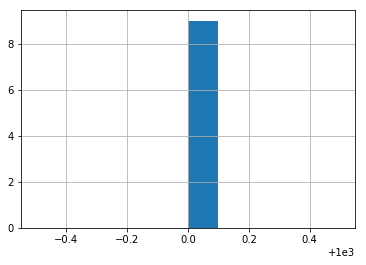

In [38]:
AMOUNT.hist()
plt.show()

In [44]:
df_acao = df2.copy()
df_acao.set_index('Date', inplace = True)
AMOUNT = pd.Series([1000,1000,1000,1000,1000,1000,1000,1000,1000])
P = pd.Series([60.55,23.05,6.72,397.41,59.96,37.44,41.04,106.13,77.37])
#P = pd.Series([16.76,12.50,69.51,49.12,24.17,29.440,15.40])
Position = P * AMOUNT
N = AMOUNT.count()
linhas = ['QUANTIDADE', 'PRECO', 'DELTA']
df_par = pd.DataFrame([AMOUNT,P,Position])
df_par.columns = df_acao.columns.values
df_par.index  = linhas

In [45]:
df_par

,EWZ,OIL US,BAC US,AAPL,GDX,FXI,EEM,GS,XOM
QUANTIDADE,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
PRECO,60.55,23.05,6.72,397.41,59.96,37.44,41.04,106.13,77.37
DELTA,60550.00,23050.00,6720.00,397410.00,59960.00,37440.00,41040.00,106130.00,77370.00


In [46]:
col = []
col_ret = []
col_pl = []
col_pr = []
df_acao = df_acao.sort_values(by = 'Date',ascending = True)
for acao in df_acao:     
    name_ret = df_acao[acao].name + '_RET'
    name_pl = df_acao[acao].name + '_PL'
    df_acao[name_ret] = df_acao[acao].pct_change()
    df_acao[name_pl] = df_acao[name_ret]*df_par[acao].DELTA
    #df_PL = df_PL.append(df_acao[name_pl].reset_index()[name_pl])
    col.append(acao)
    col.append(name_ret)
    col.append(name_pl)
    col_pr.append(acao)
    col_ret.append(name_ret)
    col_pl.append(name_pl)

df_acao = df_acao[col]
df_acao = df_acao.sort_values(by = 'Date',ascending = False)


In [47]:
df_acao.head()

,EWZ,EWZ_RET,EWZ_PL,OIL US,OIL US_RET,OIL US_PL,BAC US,BAC US_RET,BAC US_PL,AAPL,...,FXI_PL,EEM,EEM_RET,EEM_PL,GS,GS_RET,GS_PL,XOM,XOM_RET,XOM_PL
Date,,,,,,,,,,,,,,,,,,,,,
2011-11-01,60.55,-0.029181,-1766.891134,23.052,-0.018228,-420.161840,6.40,-0.062958,-423.074671,396.51,...,-571.048253,39.820,-0.024378,-1000.485116,103.54,-0.054861,-5822.376084,75.94,-0.027532,-2130.176719
2011-10-31,62.37,-0.033173,-2008.634320,23.480,-0.007608,-175.359256,6.83,-0.070748,-475.428571,404.78,...,-1713.977243,40.815,-0.037382,-1534.160377,109.55,-0.054462,-5780.081996,78.09,-0.041605,-3219.002209
2011-10-28,64.51,0.021698,1313.802661,23.660,-0.005046,-116.316232,7.35,0.018006,120.997230,404.95,...,-411.536247,42.400,-0.008419,-345.519177,115.86,-0.004639,-492.355670,81.48,-0.004885,-377.967758
2011-10-27,63.14,0.058685,3553.403756,23.780,0.034813,802.436902,7.22,0.095599,642.427921,404.69,...,2155.416551,42.760,0.060779,2494.368643,116.40,0.094705,10051.058967,81.88,0.009991,773.031948
2011-10-26,59.64,0.016533,1001.082325,22.980,-0.022544,-519.629945,6.59,0.020124,135.232198,400.60,...,1509.242730,40.310,0.018444,756.927741,106.33,0.058642,6223.672840,81.07,0.020519,1587.526435


In [48]:
df_PL = df_acao[col_pl].copy()
df_RT = df_acao[col_ret].copy()
df_PR = df_acao[col_pr].copy()

['EWZ', 'OIL US', 'BAC US', 'AAPL', 'GDX', 'FXI', 'EEM', 'GS', 'XOM']

In [50]:
df_RT['TOTALSUM_RET'] = df_RT.sum(1)

In [51]:
df_RT.head()

,EWZ_RET,OIL US_RET,BAC US_RET,AAPL_RET,GDX_RET,FXI_RET,EEM_RET,GS_RET,XOM_RET,TOTALSUM_RET
Date,,,,,,,,,,
2011-11-01,-0.029181,-0.018228,-0.062958,-0.020431,-0.005439,-0.015252,-0.024378,-0.054861,-0.027532,-0.258261
2011-10-31,-0.033173,-0.007608,-0.070748,-0.000420,-0.027282,-0.045779,-0.037382,-0.054462,-0.041605,-0.318460
2011-10-28,0.021698,-0.005046,0.018006,0.000642,0.023177,-0.010992,-0.008419,-0.004639,-0.004885,0.029541
2011-10-27,0.058685,0.034813,0.095599,0.010210,0.019665,0.057570,0.060779,0.094705,0.009991,0.442018
2011-10-26,0.016533,-0.022544,0.020124,0.007115,0.009051,0.040311,0.018444,0.058642,0.020519,0.168195


In [56]:
df_PL.head()

,EWZ_PL,OIL US_PL,BAC US_PL,AAPL_PL,GDX_PL,FXI_PL,EEM_PL,GS_PL,XOM_PL
Date,,,,,,,,,
2011-11-01,-1766.891134,-420.161840,-423.074671,-8119.424626,-326.146524,-571.048253,-1000.485116,-5822.376084,-2130.176719
2011-10-31,-2008.634320,-175.359256,-475.428571,-166.834671,-1635.813492,-1713.977243,-1534.160377,-5780.081996,-3219.002209
2011-10-28,1313.802661,-116.316232,120.997230,255.322840,1389.700558,-411.536247,-345.519177,-492.355670,-377.967758
2011-10-27,3553.403756,802.436902,642.427921,4057.431103,1179.134035,2155.416551,2494.368643,10051.058967,773.031948
2011-10-26,1001.082325,-519.629945,135.232198,2827.438721,542.718886,1509.242730,756.927741,6223.672840,1587.526435


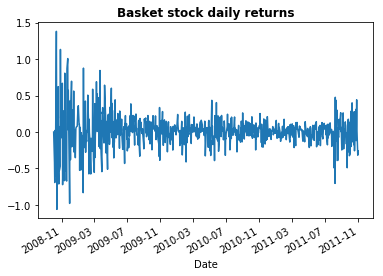

In [57]:
df_RT['TOTALSUM_RET'].plot()
plt.title(u"Basket stock daily returns", weight='bold');

0.2205482754475226

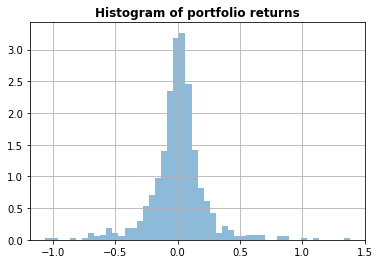

In [58]:
df_RT['TOTALSUM_RET'].hist(bins=50, density=True, histtype='stepfilled', alpha=0.5)
plt.title(u"Histogram of portfolio returns", weight='bold')
df_RT['TOTALSUM_RET'].std()

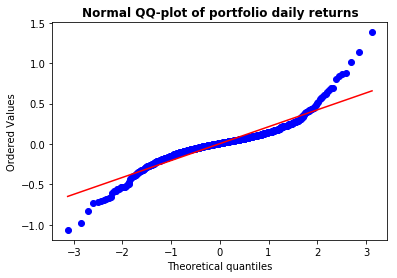

In [59]:
Q = df_RT['TOTALSUM_RET'].dropna().values
scipy.stats.probplot(Q, dist=scipy.stats.norm, plot=plt.figure().add_subplot(111))
plt.title(u"Normal QQ-plot of portfolio daily returns", weight="bold");

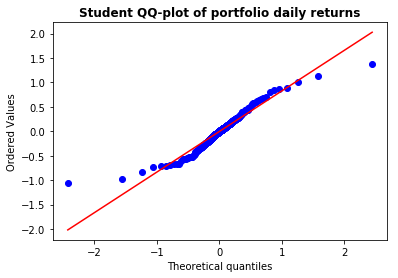

In [121]:
tdf, tmean, tsigma = scipy.stats.t.fit(Q)
scipy.stats.probplot(Q, dist=scipy.stats.t, sparams=(tdf, tmean, tsigma), plot=plt.figure().add_subplot(111))
plt.title(u"Student QQ-plot of portfolio daily returns", weight="bold");

In [60]:
df_PL['TOTALSUM_PL'] = df_PL.sum(1)

In [76]:
df_RT.head()

,EWZ_RET,OIL US_RET,BAC US_RET,AAPL_RET,GDX_RET,FXI_RET,EEM_RET,GS_RET,XOM_RET,TOTALSUM_RET
Date,,,,,,,,,,
2011-11-01,-0.029181,-0.018228,-0.062958,-0.020431,-0.005439,-0.015252,-0.024378,-0.054861,-0.027532,-0.258261
2011-10-31,-0.033173,-0.007608,-0.070748,-0.000420,-0.027282,-0.045779,-0.037382,-0.054462,-0.041605,-0.318460
2011-10-28,0.021698,-0.005046,0.018006,0.000642,0.023177,-0.010992,-0.008419,-0.004639,-0.004885,0.029541
2011-10-27,0.058685,0.034813,0.095599,0.010210,0.019665,0.057570,0.060779,0.094705,0.009991,0.442018
2011-10-26,0.016533,-0.022544,0.020124,0.007115,0.009051,0.040311,0.018444,0.058642,0.020519,0.168195


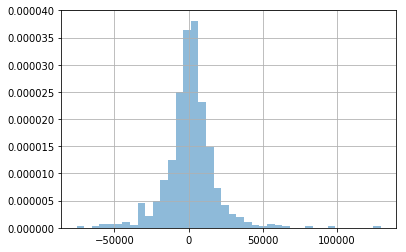

In [62]:
returns = df_PL['TOTALSUM_PL']
mean = returns.mean()
sigma = returns.std()
tdf, tmean, tsigma = scipy.stats.t.fit(returns.values)
returns.hist(bins=40, density=True, histtype='stepfilled', alpha=0.5);

In [63]:
returns.quantile(0.05)

-26589.9440782164

In [64]:
portfolio_position = df_par.sum(1).DELTA

In [65]:
portfolio_position

809670.0

In [69]:
H_var = -returns.quantile(0.05)/portfolio_position 
print ("P Var = {0:.2f}%".format(H_var*100))

P Var = 3.28%


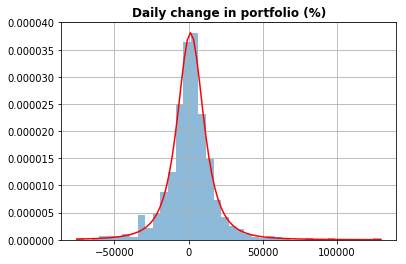

In [66]:
support = np.linspace(returns.min(), returns.max(), 100)
returns.hist(bins=40, density=True, histtype='stepfilled', alpha=0.5);
plt.plot(support, scipy.stats.t.pdf(support, loc=tmean, scale=tsigma, df=tdf), "r-")
plt.title(u"Daily change in portfolio (%)", weight='bold');

In [67]:
scipy.stats.norm.ppf(0.05, mean, sigma)

-27100.22050007433

In [68]:
P_var = -scipy.stats.norm.ppf(0.05, mean, sigma)/portfolio_position 
print ("P Var = {0:.2f}%".format(P_var*100))

P Var = 3.35%


## Value at Risk - Monte Carlo 

In [78]:
days = 300   # time horizon
dt = 1/float(days)
sigma = 0.220548 # volatility
mu = 0.004747  # drift (average growth rate)

In [74]:
np.zeros(days)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [79]:
def random_walk(startprice):
    price = np.zeros(days)
    shock = np.zeros(days)
    price[0] = startprice
    for i in range(1, days):
        shock[i] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        price[i] = max(0, price[i-1] + shock[i] * price[i-1])
    return price

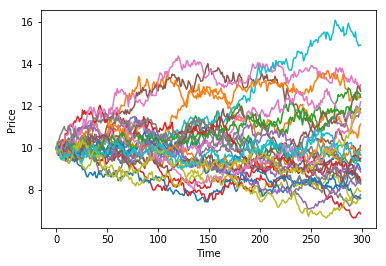

In [80]:
for run in range(30):
    plt.plot(random_walk(10.0))
plt.xlabel("Time")
plt.ylabel("Price");

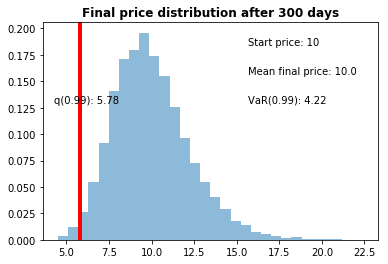

In [81]:
runs = 10000
simulations = np.zeros(runs)
for run in range(runs):
    simulations[run] = random_walk(10.0)[days-1]
q = np.percentile(simulations, 1)
plt.hist(simulations, density=True, bins=30, histtype='stepfilled', alpha=0.5)
plt.figtext(0.6, 0.8, u"Start price: 10")
plt.figtext(0.6, 0.7, u"Mean final price: {:.3}".format(simulations.mean()))
plt.figtext(0.6, 0.6, u"VaR(0.99): {:.3}".format(10 - q))
plt.figtext(0.15, 0.6, u"q(0.99): {:.3}".format(q))
plt.axvline(x=q, linewidth=4, color='r')
plt.title(u"Final price distribution after {} days".format(days), weight='bold');

In [82]:
np.percentile(simulations, 1) 

5.784000636200621

In [75]:

df_acao.describe()

,EWZ,EWZ_RET,EWZ_PL,OIL US,OIL US_RET,OIL US_PL,BAC US,BAC US_RET,BAC US_PL,AAPL,...,FXI_PL,EEM,EEM_RET,EEM_PL,GS,GS_RET,GS_PL,XOM,XOM_RET,XOM_PL
count,777.000000,776.000000,776.000000,777.000000,776.000000,776.000000,777.000000,776.000000,776.000000,777.000000,...,776.000000,777.000000,776.000000,776.000000,777.000000,776.000000,776.000000,777.000000,776.000000,776.000000
mean,62.691294,0.000790,47.821847,24.524903,-0.000745,-17.181511,13.199434,-0.000618,-4.155884,236.985641,...,21.443216,38.358814,0.000765,31.385048,140.121129,0.000322,34.161074,71.695360,0.000191,14.799552
std,14.391840,0.030849,1867.926214,4.653801,0.027441,632.507531,4.051617,0.055882,375.528046,98.164354,...,1135.169919,8.093572,0.029634,1216.199339,30.854583,0.034790,3692.289663,7.115156,0.021294,1647.539627
min,26.890000,-0.196277,-11884.555275,14.640000,-0.124956,-2880.235402,3.140000,-0.289694,-1946.740947,78.200000,...,-5558.152278,18.260000,-0.161662,-6634.608939,52.000000,-0.189596,-20121.841205,56.570000,-0.139525,-10795.069004
25%,54.230000,-0.012445,-753.522736,22.120000,-0.015699,-361.860335,11.240000,-0.019130,-128.553828,144.670000,...,-442.373660,33.740000,-0.010280,-421.910069,121.350000,-0.012442,-1320.434423,66.950000,-0.008164,-631.665190
50%,67.760000,0.001460,88.378221,24.120000,0.000000,0.000000,13.520000,-0.001390,-9.342272,242.430000,...,-4.139761,40.200000,0.000957,39.291002,147.880000,-0.000505,-53.626715,70.650000,-0.000127,-9.809933
75%,73.970000,0.013425,812.913398,25.860000,0.014775,340.553086,15.740000,0.017747,119.262860,331.290000,...,444.080276,45.400000,0.011978,491.565296,163.630000,0.013647,1448.345343,76.780000,0.008651,669.358772
max,81.580000,0.255807,15489.126016,55.150000,0.095059,2191.105882,34.480000,0.352691,2370.084986,422.240000,...,7589.004739,50.200000,0.255959,10504.538860,192.280000,0.264678,28090.307635,87.980000,0.171905,13300.295061


In [77]:
df_RT.describe()

,EWZ_RET,OIL US_RET,BAC US_RET,AAPL_RET,GDX_RET,FXI_RET,EEM_RET,GS_RET,XOM_RET,TOTALSUM_RET
count,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,777.000000
mean,0.000790,-0.000745,-0.000618,0.002063,0.001413,0.000573,0.000765,0.000322,0.000191,0.004747
std,0.030849,0.027441,0.055882,0.022374,0.032154,0.030320,0.029634,0.034790,0.021294,0.220548
min,-0.196277,-0.124956,-0.289694,-0.091502,-0.155322,-0.148455,-0.161662,-0.189596,-0.139525,-1.061870
25%,-0.012445,-0.015699,-0.019130,-0.009360,-0.013627,-0.011816,-0.010280,-0.012442,-0.008164,-0.080623
50%,0.001460,0.000000,-0.001390,0.001886,0.000675,-0.000111,0.000957,-0.000505,-0.000127,0.009720
75%,0.013425,0.014775,0.017747,0.013268,0.017065,0.011861,0.011978,0.013647,0.008651,0.093707
max,0.255807,0.095059,0.352691,0.139050,0.265385,0.202698,0.255959,0.264678,0.171905,1.381720
